<a href="https://colab.research.google.com/github/mixhub10/dl16/blob/main/project/dl16_prj03_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#
# [DIY-1] training history를 이용홰서 loss와 accuracy 그래프 그리기
#
import matplotlib.pyplot as plt

loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()

In [ ]:
#
# [DIY-2] test 데이터에 모델 적용하고 정확도 계산
#
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)


In [3]:
#
# [Prj-3] test 데이터를 validation으로 설정해서 모델을 다시 훈련시키시오.
# 그리고 training history를 이용해서 loss, val_loss와 accuracy, val-accuracy 그래프 그리기
# file name: dlxx_prj03_CNN_MNIST.ipynb
# 깃허브의 project 폴더에 저장하시오.
#

In [1]:
# import tensorflow as tf
from tensorflow.keras import datasets, layers, models
# import keras

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print(train_images.shape, train_labels.shape)


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000,)


In [2]:
# 픽셀 값을 0~1 사이로 정규화한다. 
train_images, test_images = train_images / 255.0, test_images / 255.0


model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 20s 5ms/step - loss: 0.1484 - accuracy: 0.9546 - val_loss: 0.0590 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0465 - accuracy: 0.9860 - val_loss: 0.0348 - val_accuracy: 0.9896
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.0309 - val_accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0286 - val_accuracy: 0.9906
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0283 - val_accuracy: 0.9919
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0164 - accuracy: 0.9950 - val_loss: 0.0276 - val_accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0130 - accuracy: 0.9956 - val_loss: 0.0253 - val_accur

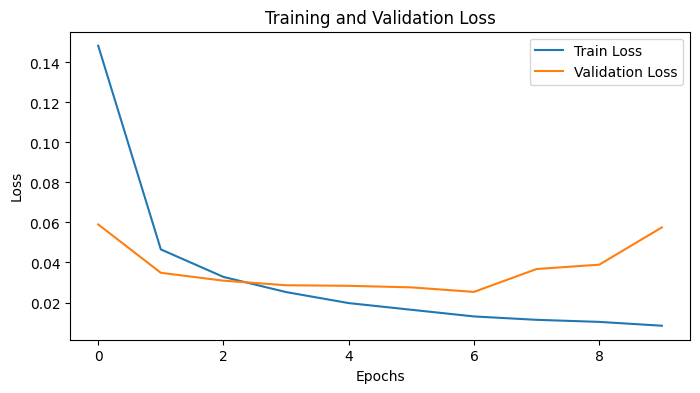

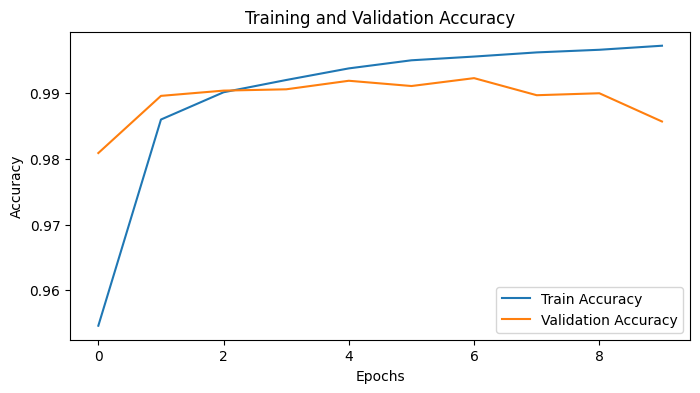

In [5]:
import matplotlib.pyplot as plt

# 훈련 손실과 검증 손실 그래프
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 훈련 정확도와 검증 정확도 그래프
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()